<a href="https://colab.research.google.com/github/jasonngai01/AI_Appreciation_for-OUHK_STEAM/blob/main/ANN_training_of_Flu%2C_COVID%2C_Allegry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Artificial Neural Networks (ANNs) of Flu, Covid, Allergy and Cold (流感、Covid、過敏和感冒的人工神經網絡)

<img src = "https://imgur.com/xEOudaE.png" width = "800" />

1. In this tutorial we look at what an artificial neural network (ANN) is by building a AI docter.

2. We then extend this to a different layered, fully connected ANN and attempt the classification task again to check the model accuracy and loss (嘗試分類任務以檢查模型的準確性和損失). 

3. Also, we are going to play with some of its basic hyperparameters (基本超參數) (number of layers, neurons per layer, number of epochs, activation functions, etc) until it learns to predict at a satisfactory level.

## Step 1: Dataset Preparation (數據集準備)

 

###Step 1A: Download the dataset from Kaggle 
1. Go to the below website and download the the Covid dataset from **Kaggle**.

[Covid Dataset from Kaggle](https://www.kaggle.com/vishakhasinghiitbhu/covid-classifier)



###Step 1B: Data labelling and encoding (數據標記和編碼)

1. In the original dataset from Kaggle, you can find the last column have 4 catalogries of diseases. 

2. Change each of the disease into a into a individual column with One hot encoding format. please refer to the below example.

<img src = "https://miro.medium.com/max/700/1*ZFCX83XaMNzOAXRxAcvMJw.png" width ="800" />

source: Pat Huang



###**Question: What is One-hot encoding? WHY??**



###Step 1C: Upload Dataset  (上傳數據集)

1. Upload the dataset csv file to the drive using the below code. 

In [ ]:
# upload the dataset from local to google drive
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Covid, Cold, Flu or Allergy.csv to Covid, Cold, Flu or Allergy.csv
User uploaded file "Covid, Cold, Flu or Allergy.csv" with length 2178453 bytes


##Step 2: Importing The Libraries ((導入庫)


1. NumPy

2. Scikit-learn

3. TensorFlow

4. Keras 

5. Pandas




In [ ]:
# import the library 

import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

##Step 3: Data Preprocessing (數據預處理)


In [ ]:
# open the dataset
dataset = pd.read_csv('/content/Covid, Cold, Flu or Allergy.csv')

# show the first 10 items of dataset
dataset.head(10)



,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,ALLERGY,Covid,Cold,FLU
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0
6,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
7,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0
8,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
9,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
# make the symtomp such as cough, muscle aches be the independent (X)
# show exclude last column with values.

X = dataset.iloc[:,0:-4]. values
print(X[0])
print(X[1])
print(X[2])
print(X[3])
print(X[4])

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1]
[0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1]
[0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1]
[0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1]


In [ ]:
# make the disease such as Flu, Cold be the dependent (y)
# show the last 4 column with values.

y = dataset.iloc[:,-4:]. values
print(y[0])
print(y[1])
print(y[2])
print(y[3])
                

[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


##Step 4: Splitting the Dataset into the Training set and Test set (將數據集拆分為訓練集和測試集)

<img src ="https://miro.medium.com/max/1838/1*Xa1_gnLz8Pg6EfKwR3jz1A.jpeg" width = "600" />


In [ ]:
# split the dataset into training and test sets
# change the ration in test_size

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

###**Question: What happen if the test size increase?**

##Step 5: Feature Scaling (特徵縮放)



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Step 6: Building the ANN model (構建 ANN 模型)

<img src = "https://miro.medium.com/max/791/1*4PQOnabj78avPB2Mikk5GQ.jpeg" width = "600" />

source: shreyak

###Step 6.1: Initializing the ANN (初始化人工神經網絡)
   



In [ ]:
# initialize the model

model = tf.keras.models.Sequential()


###**Questions: Any other types of model approach ?**

###Step 6.2: Adding the Input Layer and the First Hidden Layer (添加輸入層和第一個隱藏層)


In [ ]:
# add the input layer and the first hidden layer
# input the input_dim with the number of the symptom (independent X)

model.add(tf.keras.layers.Dense(units=10, activation = 'tanh', input_dim=20))

###Step 6.3: Adding the Second Hidden Layer  (添加第二個隱藏層)

The next step is adding the second hidden layer. 

In [ ]:
# add the second hidden layer

model.add(tf.keras.layers.Dense(units=10, activation = 'tanh'))

###**Question: What happen if the thrid or fourth layer are added to the model?**


###Step 6.4: Adding the output layer (添加輸出層)

<img src = "https://miro.medium.com/max/3000/1*-eLjPY7UGSoQhSyW5qC6gw.gif" width = "600" />


In [ ]:
# add the output layer

model.add(tf.keras.layers.Dense(units=4, activation = 'softmax'))

###**Question: What using the "softmax" activition fuction rather than "sigmoid"?**

##Step 7: Training the ANN model (訓練 ANN 模型)

This step is to train the created model on our training set. 

###Step 7.1: Compiling the ANN  (編譯人工神經網絡)



In [ ]:
# compile the ANN model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###**Question: What happen if using other optimizer?**

In [ ]:
# view the summary of the hidden layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


###**Question:What is *"Param #'* ?　How to calculate the "Param #" in the whole ANN model**


### Step 7.2: Training the ANN on the Training set (在訓練集上訓練 ANN)


In [ ]:
# train the ANN model

# input the batch_size and epochs

r = model.fit(X_train, y_train, batch_size = 50, epochs = 50)

Epoch 1/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9312
Epoch 2/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0503 - accuracy: 0.9319
Epoch 3/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0503 - accuracy: 0.9310
Epoch 4/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0502 - accuracy: 0.9327
Epoch 5/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0501 - accuracy: 0.9329
Epoch 6/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0502 - accuracy: 0.9316
Epoch 7/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0501 - accuracy: 0.9305
Epoch 8/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0500 - accuracy: 0.9316
Epoch 9/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0500 - accuracy: 0.9337
Epoch 10/50
712/712 [==============================] - 1s 1ms/step - loss: 0.0499 - accuracy: 0.9334

###**Question: What happen if the Epoch and Batch size is different?**

Using the Epoch = 500, Batch size = 100 to test it. 

## Step 8: Check the loss & accuracy of the trained model (檢查訓練模型的損失和準確性)

Visualise the loss and accuracy with graphes.


In [ ]:
# import the MATPLOT library

import matplotlib.pyplot as plt

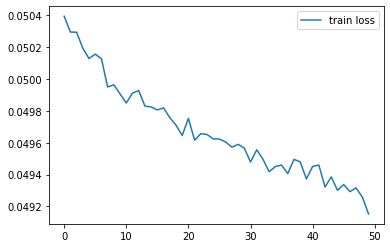

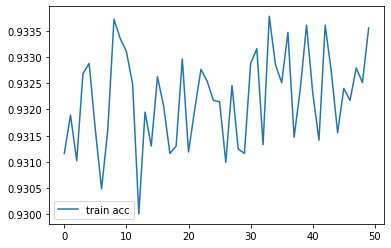

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss & accuracy
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('Loss&Acc')

plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('Loss&Acc')


##Step 9: Making the Predictions and Evaluating the Model (進行預測和評估模型)

Now the ANN model is ready and also performed on the training dataset. 


###Step 9A: Predicting the Test set results (預測測試集結果)

 

In [ ]:
# Predicting the Test set results

y_pred = model.predict (X_test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)

print(y_pred)

###Step 9B: Calculate the Accuracy score (計算準確度分數)

Accuracy calculation also requires the Scikit library. It shows how good the model is.

In [ ]:
# calculate the accuracy score

accuracy_score(y_test, y_pred)

0.930154088404004

##Step 10: Create a Predictor (創建預測器)

<img src ="http://med.stanford.edu/content/dam/sm-news/images/2015/06/precision-health-stock.jpg" width ="600" /> 

Visualising the Trained model results with new data

This is the final and the best part of a predictive model — visualizing the results. 

Yep! Nothing is more fun than seeing your code run successfully and seeing an output. 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# answer the following questions (true = 1, false = 0)

a = ([0],   # COUGH ?
  [0],   # MUSCLE_ACHES ?
  [0],   # TIREDNESS ?
  [0],   # SORE_THROAT ?
  [0],   # RUNNY_NOSE ?
  [0],   # STUFFY_NOSE ?
  [0],   # FEVER ?
  [0],   # NAUSEA ?
  [0],   # VOMITING ?
  [0],   # DIARRHEA ?
  [0],   # SHORTNESS_OF_BREATH ?
  [0],   # DIFFICULTY_BREATHING ?
  [0],   # LOSS_OF_TASTE ?
  [0],   # LOSS_OF_SMELL ?
  [0],   # ITCHY_NOSE ?
  [0],   # ITCHY_EYES ?
  [0],   # ITCHY_MOUTH ?
  [0],   # ITCHY_INNER_EAR ?
  [0],   # SNEEZING ?
  [0])   # PINK_EYE ?
xnew = np.transpose(a)

In [ ]:
# xnew=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

if xnew == [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]:
 print('You are OKAY!!')
else:
 y_pred = model.predict(xnew)*100
 # Printing the accuracy
 print('Allergy Probability - ', y_pred[0][0],'%')
 print('Covid Probability - ', y_pred[0][1],'%')
 print('Cold Probability - ', y_pred[0][2],'%')
 print('Flu Probability - ', y_pred[0][3],'%')


You are OKAY!!


## Source:

1. [Greycampus](https://www.greycampus.com/blog/data-science/artificial-neural-network-walkthrough)

2. [Kaggle](https://www.kaggle.com/vishakhasinghiitbhu/covid-classifier)